In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.47466882]
 [2.96683807]]


In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.47466882],
       [10.40834496]])

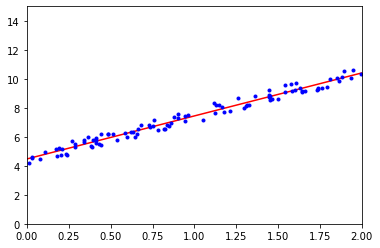

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [6]:
lin_reg.intercept_, lin_reg.coef_

(array([4.47466882]), array([[2.96683807]]))

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.47466882],
       [2.96683807]])

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.47466882],
       [2.96683807]])

In [9]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
print(theta)

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[-0.41717349]
 [ 0.34998634]]
[[4.47466882]
 [2.96683807]]


<h1>Stochastic Gradient Descent</h1>

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
theta

array([[4.46398756],
       [2.96291392]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.46316095]), array([2.98436228]))